<h1 style="text-align: center">
Deep Learning </br> 
Image Classification
</h1>

## Import needed libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm
from sklearn.metrics import classification_report

## Loading and Pre-Processing data

In [ ]:
## Download FashionMNIST dataset
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# use fashion mnist dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
    )

test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    download=True,
    train=False,
    transform = transforms.Compose([transforms.ToTensor()])
    )
#################################################################################
#                                   THE END                                     #
#################################################################################

100%|██████████| 26421880/26421880 [00:00<00:00, 120517250.84it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 95447095.27it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 62994219.78it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21744488.41it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



In [ ]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# split training set into train and validation data
train_size = 48000
val_size = 60000 - train_size
train_ds,val_ds = random_split(train_set, [train_size, val_size])

#################################################################################
#                                   THE END                                     #
#################################################################################

In [ ]:
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
# Loading the dataset into memory using Dataloader
# use your desired batch size and shuffle is necessary
train_dataloader = DataLoader(train_ds, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_ds, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=60000, shuffle=True)
classes = train_set.classes

#################################################################################
#                                   THE END                                     #
#################################################################################

**Display some images from dataset**

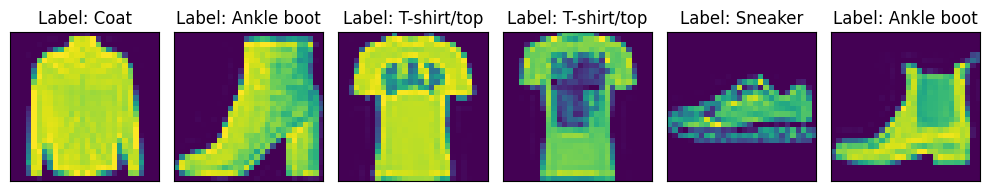

In [ ]:
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i,ax in zip(range(0,6),axes.flat):
    img,label=images[i],labels[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(f"Label: {classes[label]}")

plt.tight_layout()
plt.show()

# Defining the Convolutional Neural Network

<img src='https://drive.google.com/uc?id=1Euy5_bGIiiYECSZUeEofgTImJWgQ0XLf'>

**<h2>Implement the model above in pytorch</h2>**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#define the CNN architecture below
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding='same'))
        self.layer2 = nn.Sequential(  
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2))
        self.layer3 = nn.Sequential(  
            nn.Conv2d(16, 32, kernel_size=3, padding='valid'))
        self.layer4 = nn.Sequential(  
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2))
        self.fc = nn.Linear(6 * 6 * 32, 10)

#################################################################################
#                                   THE END                                     #
#################################################################################
        
        
    def forward(self, x):
#################################################################################
#                          COMPLETE THE FOLLOWING SECTION                       #
#################################################################################
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
#################################################################################
#                                   THE END                                     #
#################################################################################
        
        return out

In [ ]:
# Using GPU if it's available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
cnn_model = Net()
cnn_model.to(device)

Net(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  )
  (layer2): Sequential(
    (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  )
  (layer4): Sequential(
    (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1152, out_features=10, bias=True)
)

# Defining Loss Function and optimizer
**Define appropriate Loss Function, Optimizer and Learning Rate**

In [ ]:
import torch.optim as optim

Learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(),lr=Learning_rate)

**Define number of epochs and path to save the best model**

In [ ]:
epochs = 15
save_path="/content/cnn_model"

# Finally we will train our neural network

In [ ]:
# multiclass accuracy
def multi_acc(y_pred, y_test):
    _, y_pred_tags = torch.max(y_pred, dim = 1)    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    acc = torch.round(acc * 100)
    return acc

**Implementing the training algorithm**

In [ ]:
total_step = len(train_dataloader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')


Epoch [1/15], Step [100/2400], Loss: 1.0234
Epoch [1/15], Step [200/2400], Loss: 0.9047
Epoch [1/15], Step [300/2400], Loss: 1.1038
Epoch [1/15], Step [400/2400], Loss: 0.9138
Epoch [1/15], Step [500/2400], Loss: 0.9613
Epoch [1/15], Step [600/2400], Loss: 0.5839
Epoch [1/15], Step [700/2400], Loss: 0.5147
Epoch [1/15], Step [800/2400], Loss: 0.6262
Epoch [1/15], Step [900/2400], Loss: 0.8419
Epoch [1/15], Step [1000/2400], Loss: 0.5864
Epoch [1/15], Step [1100/2400], Loss: 0.6421
Epoch [1/15], Step [1200/2400], Loss: 0.5799
Epoch [1/15], Step [1300/2400], Loss: 0.5402
Epoch [1/15], Step [1400/2400], Loss: 0.4049
Epoch [1/15], Step [1500/2400], Loss: 0.6883
Epoch [1/15], Step [1600/2400], Loss: 0.3321
Epoch [1/15], Step [1700/2400], Loss: 0.5752
Epoch [1/15], Step [1800/2400], Loss: 0.6232
Epoch [1/15], Step [1900/2400], Loss: 0.4263
Epoch [1/15], Step [2000/2400], Loss: 0.4333
Epoch [1/15], Step [2100/2400], Loss: 0.5083
Epoch [1/15], Step [2200/2400], Loss: 0.3322
Epoch [1/15], Step 

**Accuracy Result on Test Data**

In [ ]:
# Testing the model
cnn_model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the {len(test_set)} test images: {100 * correct / total}%')

Accuracy of the model on the 10000 test images: 89.04%
